# Evidence of Discrimination?

The Department of Developmental Services (DDS) in California is responsible for allocating funds to support over 250,000 developmentally-disabled residents. The data set `ca_dds_expenditures.csv` contains data about 1,000 of these residents. The data comes from a discrimination lawsuit which alleged that California's Department of Developmental Services (DDS) privileged white (non-Hispanic) residents over Hispanic residents in allocating funds. We will focus on comparing the allocation of funds (i.e., expenditures) for these two ethnicities only, although there are other ethnicities in this data set.

There are 6 variables in this data set:

- Id:  5-digit, unique identification code for each consumer (similar to a social security number and used for identification purposes)  
- Age Cohort:  Binned age variable represented as six age cohorts (0-5, 6-12, 13-17, 18-21, 22-50, and 51+)
- Age:  Unbinned age variable
- Gender:  Male or Female
- Expenditures:  Dollar amount of annual expenditures spent on each consumer
- Ethnicity:  Eight ethnic groups (American Indian, Asian, Black, Hispanic, Multi-race, Native Hawaiian, Other, and White non-Hispanic)

# Question 1

Read in the data set. Make a graphic that compares the _average_ expenditures by the DDS on Hispanic residents and white (non-Hispanic) residents. Comment on what you see.

In [18]:
# YOUR CODE HERE
import pandas as pd
import numpy as np
%matplotlib inline

dds_df =  pd.read_csv("ca_dds_expenditures.csv")
dds_df

,Id,Age Cohort,Age,Gender,Expenditures,Ethnicity
0,10210,13 to 17,17,Female,2113,White not Hispanic
1,10409,22 to 50,37,Male,41924,White not Hispanic
2,10486,0 to 5,3,Male,1454,Hispanic
3,10538,18 to 21,19,Female,6400,Hispanic
4,10568,13 to 17,13,Male,4412,White not Hispanic
...,...,...,...,...,...,...
995,99622,51+,86,Female,57055,White not Hispanic
996,99715,18 to 21,20,Male,7494,Hispanic
997,99718,13 to 17,17,Female,3673,Multi Race
998,99791,6 to 12,10,Male,3638,Hispanic


<Axes: xlabel='Ethnicity'>

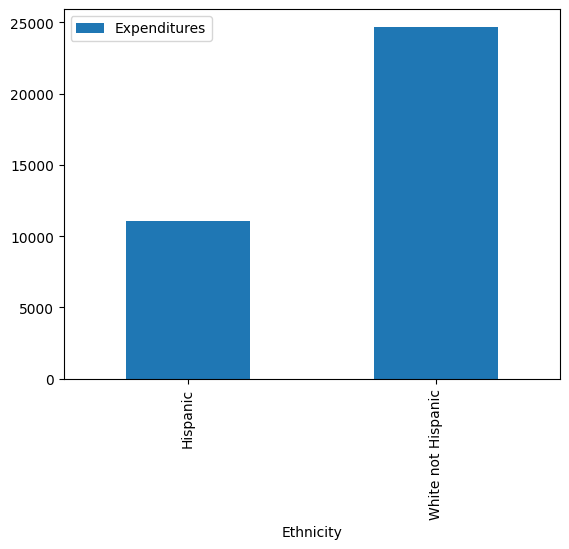

In [19]:
# Create a pivot table from the DataFrame dds_df
# The pivot table summarizes the mean (average) expenditures for each unique ethnicity
expend_cube = dds_df.pivot_table(index="Ethnicity", values="Expenditures", aggfunc='mean')

# Select specific ethnicities ("Hispanic" and "White not Hispanic") from the pivot table
selected_ethnicities = expend_cube.loc[["Hispanic", "White not Hispanic"]]

# Plot a bar chart to visualize the mean expenditures for the selected ethnicities
selected_ethnicities.plot.bar()


Based on the bar charts,Department of Developmental Services (DDS) spent more money for 'White not Hispanic' than for 'Hispanic'.

# Question 2

Now, calculate the average expenditures by ethnicity and age cohort. Make a graphic that compares the average expenditure on Hispanic residents and white (non-Hispanic) residents, _within each age cohort_.

Comment on what you see. How do these results appear to contradict the results you obtained in Question 1?

/var/folders/vg/kqlqp6hs4fn4s6f10g8d_gbr0000gn/T/ipykernel_11353/1700045564.py:3: FutureWarning: The provided callable <function mean at 0x103e45760> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'mean' instead.
  expend_cube = dds_df.pivot_table(index="Ethnicity", columns="Age Cohort", values="Expenditures", aggfunc=np.mean)


<Axes: xlabel='Ethnicity'>

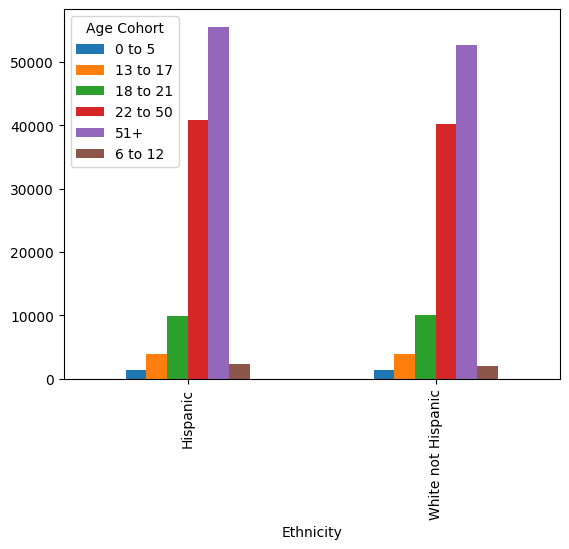

In [20]:
# create pivot table from the DataFrame dds_data
# The pivot table summarizes the mean (average) expenditures for each unique combination of "Ethnicity" and "Age Cohort"
expend_cube = dds_df.pivot_table(index="Ethnicity", columns="Age Cohort", values="Expenditures", aggfunc=np.mean)
# select specific ethnicities ("Hispanic" and "White not Hispanic") from the pivot table
selected_ethnicities = expend_cube.loc[["Hispanic", "White not Hispanic"]]

# Plot a bar chart to visualize the mean expenditures for the selected ethnicities across different age cohorts
selected_ethnicities.plot.bar()



**YOUR EXPLANATION HERE**

The analysis based on ethnicity might be biased if the dataset does not adequately represent the diverse population, leading to potential inaccuracies in generalizing spending patterns to different ethnic groups.
Bias may arise in the analysis of expenditures across age cohorts if the dataset is not representative across different age groups, impacting the reliability of conclusions about spending behaviors within each age cohort.

# Question 3

Can you explain the discrepancy between the two analyses you conducted above (i.e., Questions 1 and 2)? Try to tell a complete story that interweaves tables, graphics, and explanation.

_Hint:_ You might want to consider looking at:

- the distributions of ages of Hispanics and whites
- the average expenditure as a function of age

In [21]:
# YOUR CODE HERE (although you may want to add more code cells)

**YOUR EXPLANATION HERE (although you may want to add more markdown cells)**

<Axes: xlabel='Age Cohort'>

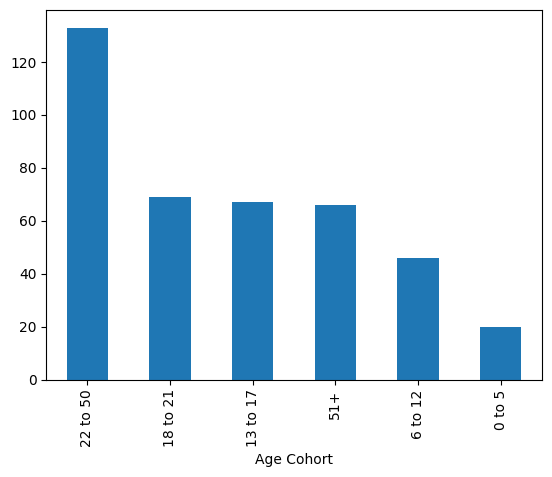

In [22]:
#the distributions of ages of Hispanics and whites
dds_df.loc[dds_df["Ethnicity"] == "White not Hispanic","Age Cohort"].value_counts().plot.bar()

age groups that are Hispanic

<Axes: xlabel='Age Cohort'>

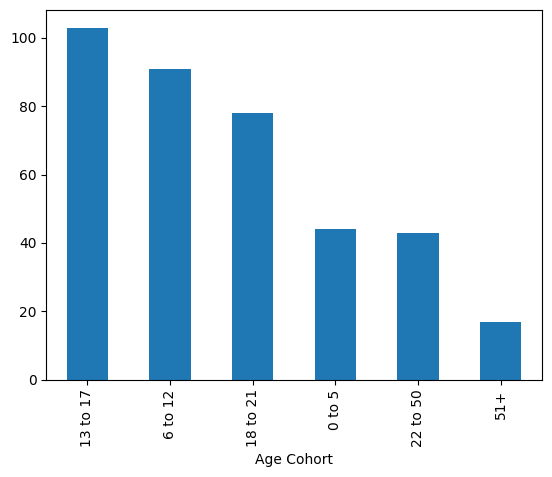

In [23]:
dds_df.loc[dds_df["Ethnicity"] == "Hispanic","Age Cohort"].value_counts().plot.bar()

Now, despite race for age cohorts

<Axes: xlabel='Age Cohort'>

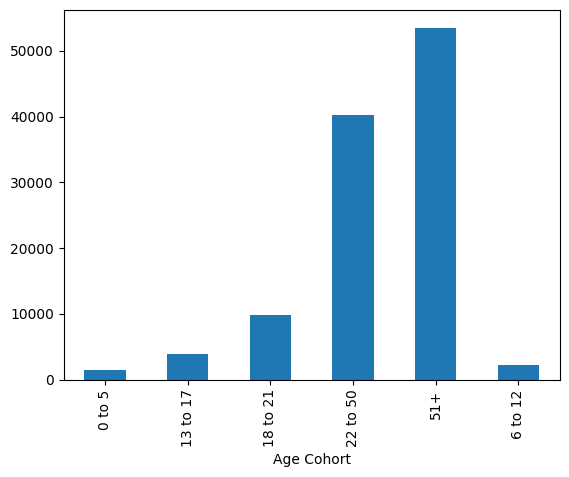

In [24]:
dds_df.groupby("Age Cohort")["Expenditures"].mean().plot.bar()

Expenditures for the 51+ age group exhibit a high volume, with approximately 66 individuals in the White category and only 17 individuals in the Hispanic category. The second-highest spending group, aged 22 to 50, shows approximately 133 individuals for White and 43 individuals for Hispanic. Although these groups may have similar means, the total amounts spent in these categories differ.